Random layout generation

In [1]:
import random

# Departments including facility 'I'
machines = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
population = []

def generate_population():
    for _ in range(30):  # assuming population size is 30
        chromosome = machines.copy()
        random.shuffle(chromosome)
        population.append(chromosome)
    return population

# Call the function to generate the population
generated_population = generate_population()
print("Generated Population:")
for i, chromosome in enumerate(generated_population, start=1):
    print(f"{i}: {chromosome}")

Generated Population:
1: ['A', 'G', 'I', 'E', 'D', 'H', 'F', 'B', 'C']
2: ['B', 'F', 'E', 'A', 'H', 'G', 'I', 'C', 'D']
3: ['C', 'H', 'I', 'E', 'F', 'B', 'G', 'A', 'D']
4: ['D', 'F', 'I', 'E', 'B', 'A', 'G', 'C', 'H']
5: ['C', 'D', 'H', 'F', 'I', 'G', 'A', 'E', 'B']
6: ['F', 'G', 'H', 'I', 'C', 'E', 'D', 'A', 'B']
7: ['C', 'H', 'I', 'B', 'A', 'G', 'E', 'D', 'F']
8: ['D', 'G', 'B', 'I', 'F', 'H', 'C', 'E', 'A']
9: ['A', 'H', 'I', 'D', 'E', 'F', 'G', 'C', 'B']
10: ['F', 'E', 'A', 'C', 'H', 'I', 'B', 'G', 'D']
11: ['C', 'B', 'D', 'A', 'G', 'F', 'E', 'H', 'I']
12: ['F', 'B', 'C', 'A', 'E', 'G', 'H', 'I', 'D']
13: ['I', 'B', 'G', 'A', 'H', 'F', 'D', 'C', 'E']
14: ['F', 'I', 'G', 'H', 'E', 'D', 'C', 'B', 'A']
15: ['A', 'E', 'D', 'I', 'B', 'H', 'C', 'F', 'G']
16: ['G', 'C', 'A', 'D', 'I', 'B', 'H', 'E', 'F']
17: ['F', 'H', 'A', 'C', 'D', 'I', 'E', 'B', 'G']
18: ['B', 'A', 'G', 'F', 'H', 'I', 'E', 'D', 'C']
19: ['E', 'G', 'D', 'B', 'H', 'I', 'C', 'F', 'A']
20: ['E', 'F', 'G', 'D', 'I', 'A', 'C

Genareted layout intergeted with tree slicing method

Layout #1: ['A', 'D', 'C', 'F', 'H', 'I', 'G', 'B', 'E']
Slicing tree: ['*', 'v', '*', 'v', 'v', 'v', 'v', 'v']


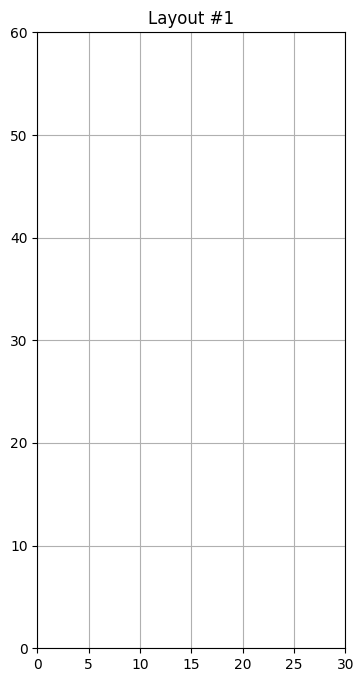

Layout #2: ['B', 'H', 'E', 'A', 'C', 'D', 'G', 'F', 'I']
Slicing tree: ['v', 'v', '*', 'v', '*', 'v', '*', 'v']


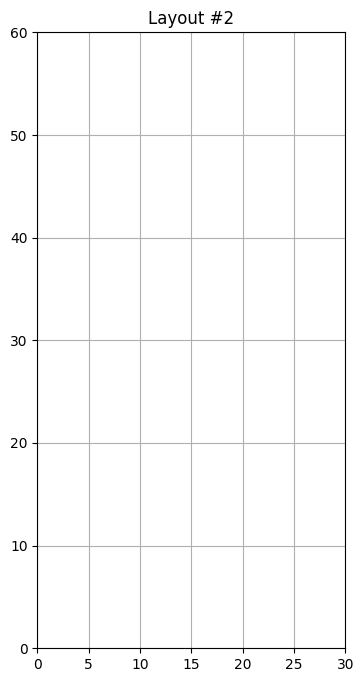

Layout #3: ['E', 'C', 'D', 'I', 'H', 'B', 'G', 'A', 'F']
Slicing tree: ['*', '*', 'v', 'v', '*', 'v', 'v', 'v']


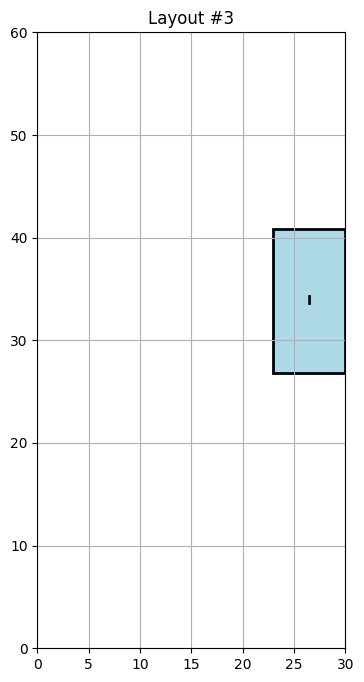

Layout #4: ['D', 'C', 'A', 'G', 'I', 'H', 'B', 'F', 'E']
Slicing tree: ['v', 'v', 'v', 'v', '*', 'v', '*', '*']


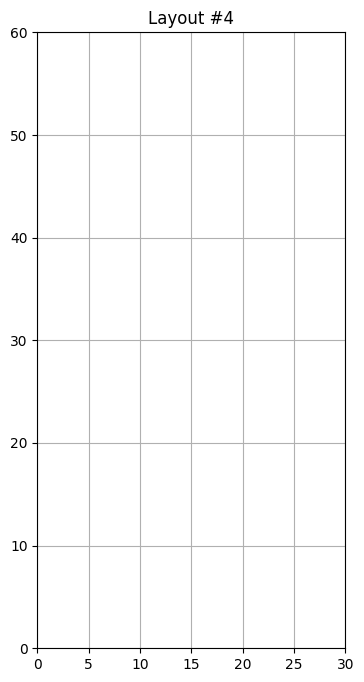

Layout #5: ['E', 'A', 'I', 'D', 'F', 'G', 'H', 'B', 'C']
Slicing tree: ['v', 'v', '*', '*', '*', '*', 'v', '*']


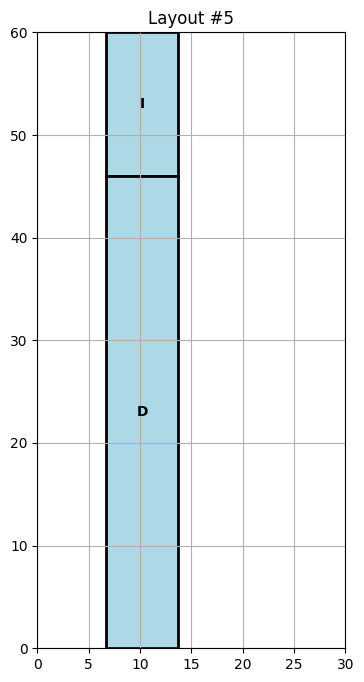

In [24]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# === Parameters ===
layout_width = 30
layout_height = 60
population_size = 5

# === Departments (facilities) with dimensions ===
machines = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
facility_dimensions = {
    'A': (8, 16), 'B': (7, 30), 'C': (10, 30), 'D': (7, 46), 'E': (6, 46),
    'F': (16, 9), 'G': (6, 14), 'H': (17, 14), 'I': (7, 14)
}

# === Generate random slicing tree (symbols: '*' for H, 'v' for V) ===
def generate_slicing_tree(length):
    return [random.choice(['*', 'v']) for _ in range(length - 1)]

# === Generate population of layouts ===
def generate_population():
    population = []
    for _ in range(population_size):
        chromosome = machines.copy()
        random.shuffle(chromosome)
        population.append(chromosome)
    return population

# === Weighted slicing layout algorithm ===
def recursive_slicing_weighted(x, y, width, height, facilities, cuts, cut_index=0):
    if len(facilities) == 1:
        fname = facilities[0]
        fw, fh = facility_dimensions[fname]
        # Try original orientation
        if width >= fw and height >= fh:
            cx = x + (width - fw) / 2
            cy = y + (height - fh) / 2
            return [(fname, (cx, cy, fw, fh))]
        # Try rotated orientation
        elif width >= fh and height >= fw:
            cx = x + (width - fh) / 2
            cy = y + (height - fw) / 2
            return [(fname, (cx, cy, fh, fw))]
        # Try placing at top-left (no centering)
        elif width >= fw and height >= fh:
            return [(fname, (x, y, fw, fh))]
        elif width >= fh and height >= fw:
            return [(fname, (x, y, fh, fw))]
        else:
            print(f"Warning: Facility {fname} does not fit in assigned area ({width:.2f}x{height:.2f}), required ({fw}x{fh}) or rotated ({fh}x{fw})")
            return []
    
    cut = cuts[cut_index]
    mid = len(facilities) // 2
    left, right = facilities[:mid], facilities[mid:]

    # Area proportions
    def area(f): return facility_dimensions[f][0] * facility_dimensions[f][1]
    la, ra = sum(area(f) for f in left), sum(area(f) for f in right)
    total = la + ra

    result = []
    if cut == '*':  # Horizontal cut
        h1 = height * (la / total)
        result += recursive_slicing_weighted(x, y + (height - h1), width, h1, left, cuts, cut_index + 1)
        result += recursive_slicing_weighted(x, y, width, height - h1, right, cuts, cut_index + 1 + len(left) - 1)
    else:  # Vertical cut
        w1 = width * (la / total)
        result += recursive_slicing_weighted(x, y, w1, height, left, cuts, cut_index + 1)
        result += recursive_slicing_weighted(x + w1, y, width - w1, height, right, cuts, cut_index + 1 + len(left) - 1)
    
    return result

# === Draw layout using matplotlib ===
def draw_layout(rects, layout_id):
    fig, ax = plt.subplots(figsize=(8, 8))
    for name, (x, y, w, h) in rects:
        ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor='black', facecolor='lightblue', linewidth=2))
        ax.text(x + w / 2, y + h / 2, name, ha='center', va='center', fontsize=10, weight='bold')
    ax.set_xlim(0, layout_width)
    ax.set_ylim(0, layout_height)
    ax.set_title(f"Layout #{layout_id}")
    ax.set_aspect('equal')
    plt.grid(True)
    plt.show()

# === Run the process ===
population = generate_population()
for i, layout in enumerate(population, 1):
    slicing_tree = generate_slicing_tree(len(layout))
    rects = recursive_slicing_weighted(0, 0, layout_width, layout_height, layout, slicing_tree)
    print(f"Layout #{i}: {layout}")
    print(f"Slicing tree: {slicing_tree}")
    draw_layout(rects, i)